## Основная часть
### Импорт расширенного датасета с фичами спотифая

In [3]:
dfs = pd.read_csv("/home/gladkov2/storage/drive/full_data_from_spotify.csv")

In [262]:
dfs

,Unnamed: 0,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre,playlist,track,artist
0,0,0.586,0.350,3,-10.414,0.0279,0.7940,0.000173,0.1200,0.359,132.980,208800,folk,Folk Rock Favorites,Kitchen Table,Molly Parden
1,1,0.731,0.451,5,-12.621,0.0300,0.4820,0.022500,0.0890,0.890,120.055,266756,folk,Folk Rock Favorites,Sanctuary,Hiss Golden Messenger
2,2,0.491,0.809,10,-7.680,0.0332,0.3300,0.158000,0.0874,0.656,74.008,177366,folk,Folk Rock Favorites,Not Dead Yet,Lord Huron
3,3,0.512,0.563,0,-6.552,0.0261,0.2020,0.001920,0.0794,0.471,94.050,291615,folk,Folk Rock Favorites,I Wanna Make Promises (That I Can't Keep),Whitehorse
4,4,0.682,0.581,5,-7.181,0.0344,0.4930,0.000000,0.1100,0.761,105.057,185862,folk,Folk Rock Favorites,The Records Were Ours,Pierce Brothers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5457,995,0.540,0.723,1,-14.887,0.0414,0.1300,0.000007,0.6010,0.429,122.027,364240,metal,Metal Gear Solid,Diamond Dogs - 2016 Remaster,David Bowie
5458,996,0.567,0.943,6,-7.992,0.0387,0.0312,0.096500,0.5440,0.965,128.207,199667,metal,Metal Gear Solid,You Spin Me Round (Like a Record),Dead Or Alive
5459,997,0.557,0.782,4,-3.899,0.0475,0.0953,0.000007,0.1180,0.305,159.621,205533,metal,Metal Gear Solid,Kids In America,Kim Wilde
5460,998,0.529,0.843,6,-6.908,0.0616,0.0628,0.000827,0.0608,0.188,117.662,310333,metal,Metal Gear Solid,The Final Countdown,Europe


### Разделение на train и test

In [4]:
x_train = dfs[['danceability',
  'energy',
  'key',
  'loudness',
  'speechiness',
  'acousticness',
  'instrumentalness',
  'liveness',
  'valence',
  'tempo', 
  'duration_ms']]
y_train = dfs.genre

### Оптимизация через GridSearch

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
param_grid = {
    
    'max_depth': list(range(2, 12, 2)),
    'min_samples_leaf': list(range(1, 10, 2)),
    'min_samples_split': list(range(1, 10, 2)),
    'n_estimators': list(range(100, 10000, 400)),
    'criterion' :['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}

gs = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 80, verbose = 2)
gs.fit(x_train, y_train)

Fitting 3 folds for each of 18750 candidates, totalling 56250 fits


[Parallel(n_jobs=80)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=80)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=80)]: Done 250 tasks      | elapsed:   42.3s
[Parallel(n_jobs=80)]: Done 648 tasks      | elapsed:  1.8min
[Parallel(n_jobs=80)]: Done 1013 tasks      | elapsed:  2.7min
[Parallel(n_jobs=80)]: Done 1458 tasks      | elapsed:  3.9min
[Parallel(n_jobs=80)]: Done 1985 tasks      | elapsed:  5.2min
[Parallel(n_jobs=80)]: Done 2592 tasks      | elapsed:  6.7min
[Parallel(n_jobs=80)]: Done 3281 tasks      | elapsed:  8.4min
[Parallel(n_jobs=80)]: Done 4050 tasks      | elapsed: 10.2min
[Parallel(n_jobs=80)]: Done 4901 tasks      | elapsed: 12.4min
[Parallel(n_jobs=80)]: Done 5832 tasks      | elapsed: 15.3min
[Parallel(n_jobs=80)]: Done 6845 tasks      | elapsed: 18.7min
[Parallel(n_jobs=80)]: Done 7938 tasks      | elapsed: 22.8min
[Parallel(n_jobs=80)]: Done 9113 tasks      | elapsed: 28.5min
[Parallel(n_jobs=80)]: Done 10368 tasks     

### Импорт данных студентов с фичами спотифая

In [6]:
dfs_37 = pd.read_csv("~/storage/drive/df_37.csv")
dfs_37 = dfs_37.loc[dfs_37['coarse_genre'].isin(['Electronic','Rock','Metal','Hip-Hop','Folk', 'Pop'])]
dfs_37 = dfs_37.replace({'Electronic': 'electronic',
        'Rock': 'rock',
        'Metal':'metal',
        'Hip-Hop' :'hip-hop',
        'Folk':'folk',
        'Pop':'pop'})
dfs_37

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,duration_ms,time_signature,track,artist,source_name,student,coarse_genre,genre1,genre2,genre3
0,0,0.759,0.553,11,-8.489,0,0.0620,0.00437,0.000123,0.2200,...,180372,4,Нет мира без тебя,Ranetki Girls,Нет_мира_без_тебя-Ранетки,Роман_Кругликов,rock,Pop_Rock,NaN,NaN
1,1,0.587,0.698,1,-8.948,1,0.0943,0.01520,0.000000,0.4420,...,310720,4,"Bitch, Don’t Kill My Vibe",Kendrick Lamar,Bitch_Dont_Kill_My_Vibe-Kendrick_Lamar,Данил_Литвинов,hip-hop,Rap,Weas-Ccoast_Hip-Hop,NaN
2,2,0.568,0.837,1,-6.138,1,0.0266,0.09000,0.058700,0.0994,...,245867,4,Precious,Depeche Mode,Precious-Depeche_Mode,Данил_Литвинов,rock,Electronic_Rock,Soft_Rock,NaN
3,3,0.516,0.832,6,-5.350,0,0.0606,0.51500,0.000002,0.3610,...,138373,4,Ultima Thule,Oxxxymiron,Ultima_Thule-Oxxxymiron,Данил_Литвинов,hip-hop,Rap,NaN,NaN
4,4,0.507,0.889,7,-2.755,0,0.0860,0.04950,0.000000,0.0983,...,238360,4,unravel,TK from Ling tosite sigure,Unravel-TK,Данил_Литвинов,rock,Anime,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,0.712,0.953,11,-8.409,1,0.0466,0.03880,0.914000,0.1110,...,341163,4,Tantrum,Throwing Snow,Tantrum-Throwing_Snow,Паша_Дерябин,electronic,Dubstep,NaN,NaN
296,296,0.736,0.759,9,-7.066,1,0.0347,0.05730,0.207000,0.0778,...,170059,4,The Veldt - Radio Edit,deadmau5,The_Veldt-deadmau5_feat_Chris_James,Паша_Дерябин,electronic,House,NaN,NaN
297,297,0.463,0.525,6,-13.032,0,0.0598,0.13000,0.926000,0.1400,...,376320,4,The Violent Sequence,Worriedaboutsatan,The_Violent_Sequence-Worriedaboutsatan,Паша_Дерябин,electronic,Techno,NaN,NaN
298,298,0.685,0.630,1,-10.909,1,0.0417,0.06700,0.841000,0.1040,...,214154,4,Voyager - Original Mix,Jasper Byrne,Voyager-Jasper_Byrne,Паша_Дерябин,electronic,Synthwave,NaN,NaN


In [7]:
x_test = dfs_37[['danceability',
  'energy',
  'key',
  'loudness',
  'speechiness',
  'acousticness',
  'instrumentalness',
  'liveness',
  'valence',
  'tempo', 
  'duration_ms']]
y_test = dfs_37.coarse_genre

In [22]:
best = gs.best_estimator_
gs.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=3, n_estimators=6100)

In [26]:
with open('/home/gladkov2/storage/drive/rf_dumped_all.pkl', 'wb') as f:
    pickle.dump(best, f) 

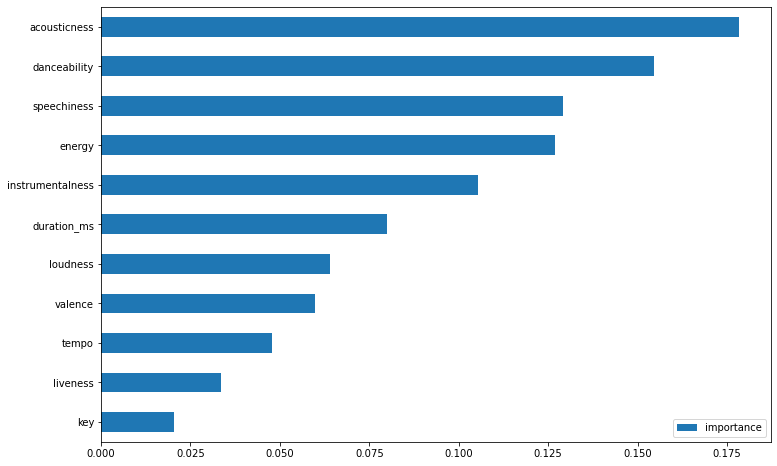

In [27]:
imp = pd.DataFrame(bes/home/gladkov2/storage/drive/DF_3.csvnces_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [35]:
y_pred = gs.predict(x_test)
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

  electronic       0.49      0.85      0.62        39
        folk       0.45      0.14      0.22        35
     hip-hop       0.62      0.56      0.59        27
       metal       0.97      0.58      0.73        48
         pop       0.13      0.11      0.12        18
        rock       0.26      0.42      0.33        33

    accuracy                           0.48       200
   macro avg       0.49      0.44      0.43       200
weighted avg       0.55      0.48      0.48       200



In [8]:
dfs_37
dfs_37[['artist','coarse_genre']].groupby("coarse_genre").count().sort_values('artist', ascending=False)

,artist
coarse_genre,
electronic,68
rock,53
metal,29
hip-hop,24
pop,15
folk,11


### Обучение RF на маленьком датасете

In [9]:
x_tr, x_te, y_tr, y_t = train_test_split(dfs_37[['danceability',
  'energy',
  'key',
  'loudness',
  'speechiness',
  'acousticness',
  'instrumentalness',
  'liveness',
  'valence',
  'tempo', 
  'duration_ms']],
  dfs_37.coarse_genre, test_size=0.3, stratify=dfs_37.coarse_genre)

In [7]:
rf_1 = RandomForestClassifier()
rf_1.fit(x_tr, y_tr)
param_grid = {
    
    'max_depth': list(range(2, 10, 2)),
    'min_samples_leaf': list(range(1, 8, 2)),
    'min_samples_split': list(range(1, 8, 2)),
    'n_estimators': list(range(100, 7000, 400)),
    'criterion' :['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}

gs_1 = GridSearchCV(estimator = rf_1, param_grid = param_grid, 
                          cv = 3, n_jobs = 80, verbose = 2)
gs_1.fit(x_tr, y_tr)

Fitting 3 folds for each of 6912 candidates, totalling 20736 fits


[Parallel(n_jobs=80)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=80)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=80)]: Done 205 tasks      | elapsed:   17.5s
[Parallel(n_jobs=80)]: Done 488 tasks      | elapsed:   37.7s
[Parallel(n_jobs=80)]: Done 853 tasks      | elapsed:  1.1min
[Parallel(n_jobs=80)]: Done 1298 tasks      | elapsed:  1.6min
[Parallel(n_jobs=80)]: Done 1825 tasks      | elapsed:  2.3min
[Parallel(n_jobs=80)]: Done 2432 tasks      | elapsed:  3.0min
[Parallel(n_jobs=80)]: Done 3121 tasks      | elapsed:  3.9min
[Parallel(n_jobs=80)]: Done 3890 tasks      | elapsed:  4.9min
[Parallel(n_jobs=80)]: Done 4741 tasks      | elapsed:  5.9min
[Parallel(n_jobs=80)]: Done 5672 tasks      | elapsed:  7.1min
[Parallel(n_jobs=80)]: Done 6685 tasks      | elapsed:  8.4min
[Parallel(n_jobs=80)]: Done 7778 tasks      | elapsed:  9.7min
[Parallel(n_jobs=80)]: Done 8953 tasks      | elapsed: 11.2min
[Parallel(n_jobs=80)]: Done 10208 tasks      

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=80,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [1, 3, 5, 7],
                         'n_estimators': [100, 500, 900, 1300, 1700, 2100, 2500,
                                          2900, 3300, 3700, 4100, 4500, 4900,
                                          5300, 5700, 6100, 6500, 6900]},
             verbose=2)

In [8]:


best_1 = gs_1.best_estimator_

with open('/home/gladkov2/storage/drive/rf_dumped_1_s.pkl', 'wb') as f:
    pickle.dump(best_1, f) 
    
gs_1.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       min_samples_split=5)

In [12]:
y_pred = gs_1.predict(x_te)
print(metrics.classification_report(y_pred, y_t))

              precision    recall  f1-score   support

  electronic       0.95      0.68      0.79        28
        folk       0.00      0.00      0.00         0
     hip-hop       0.86      0.67      0.75         9
       metal       0.78      0.88      0.82         8
         pop       0.00      0.00      0.00         0
        rock       0.50      0.53      0.52        15

    accuracy                           0.67        60
   macro avg       0.51      0.46      0.48        60
weighted avg       0.80      0.67      0.72        60



/home/gladkov2/anaconda3/envs/bi/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Просто pairplot

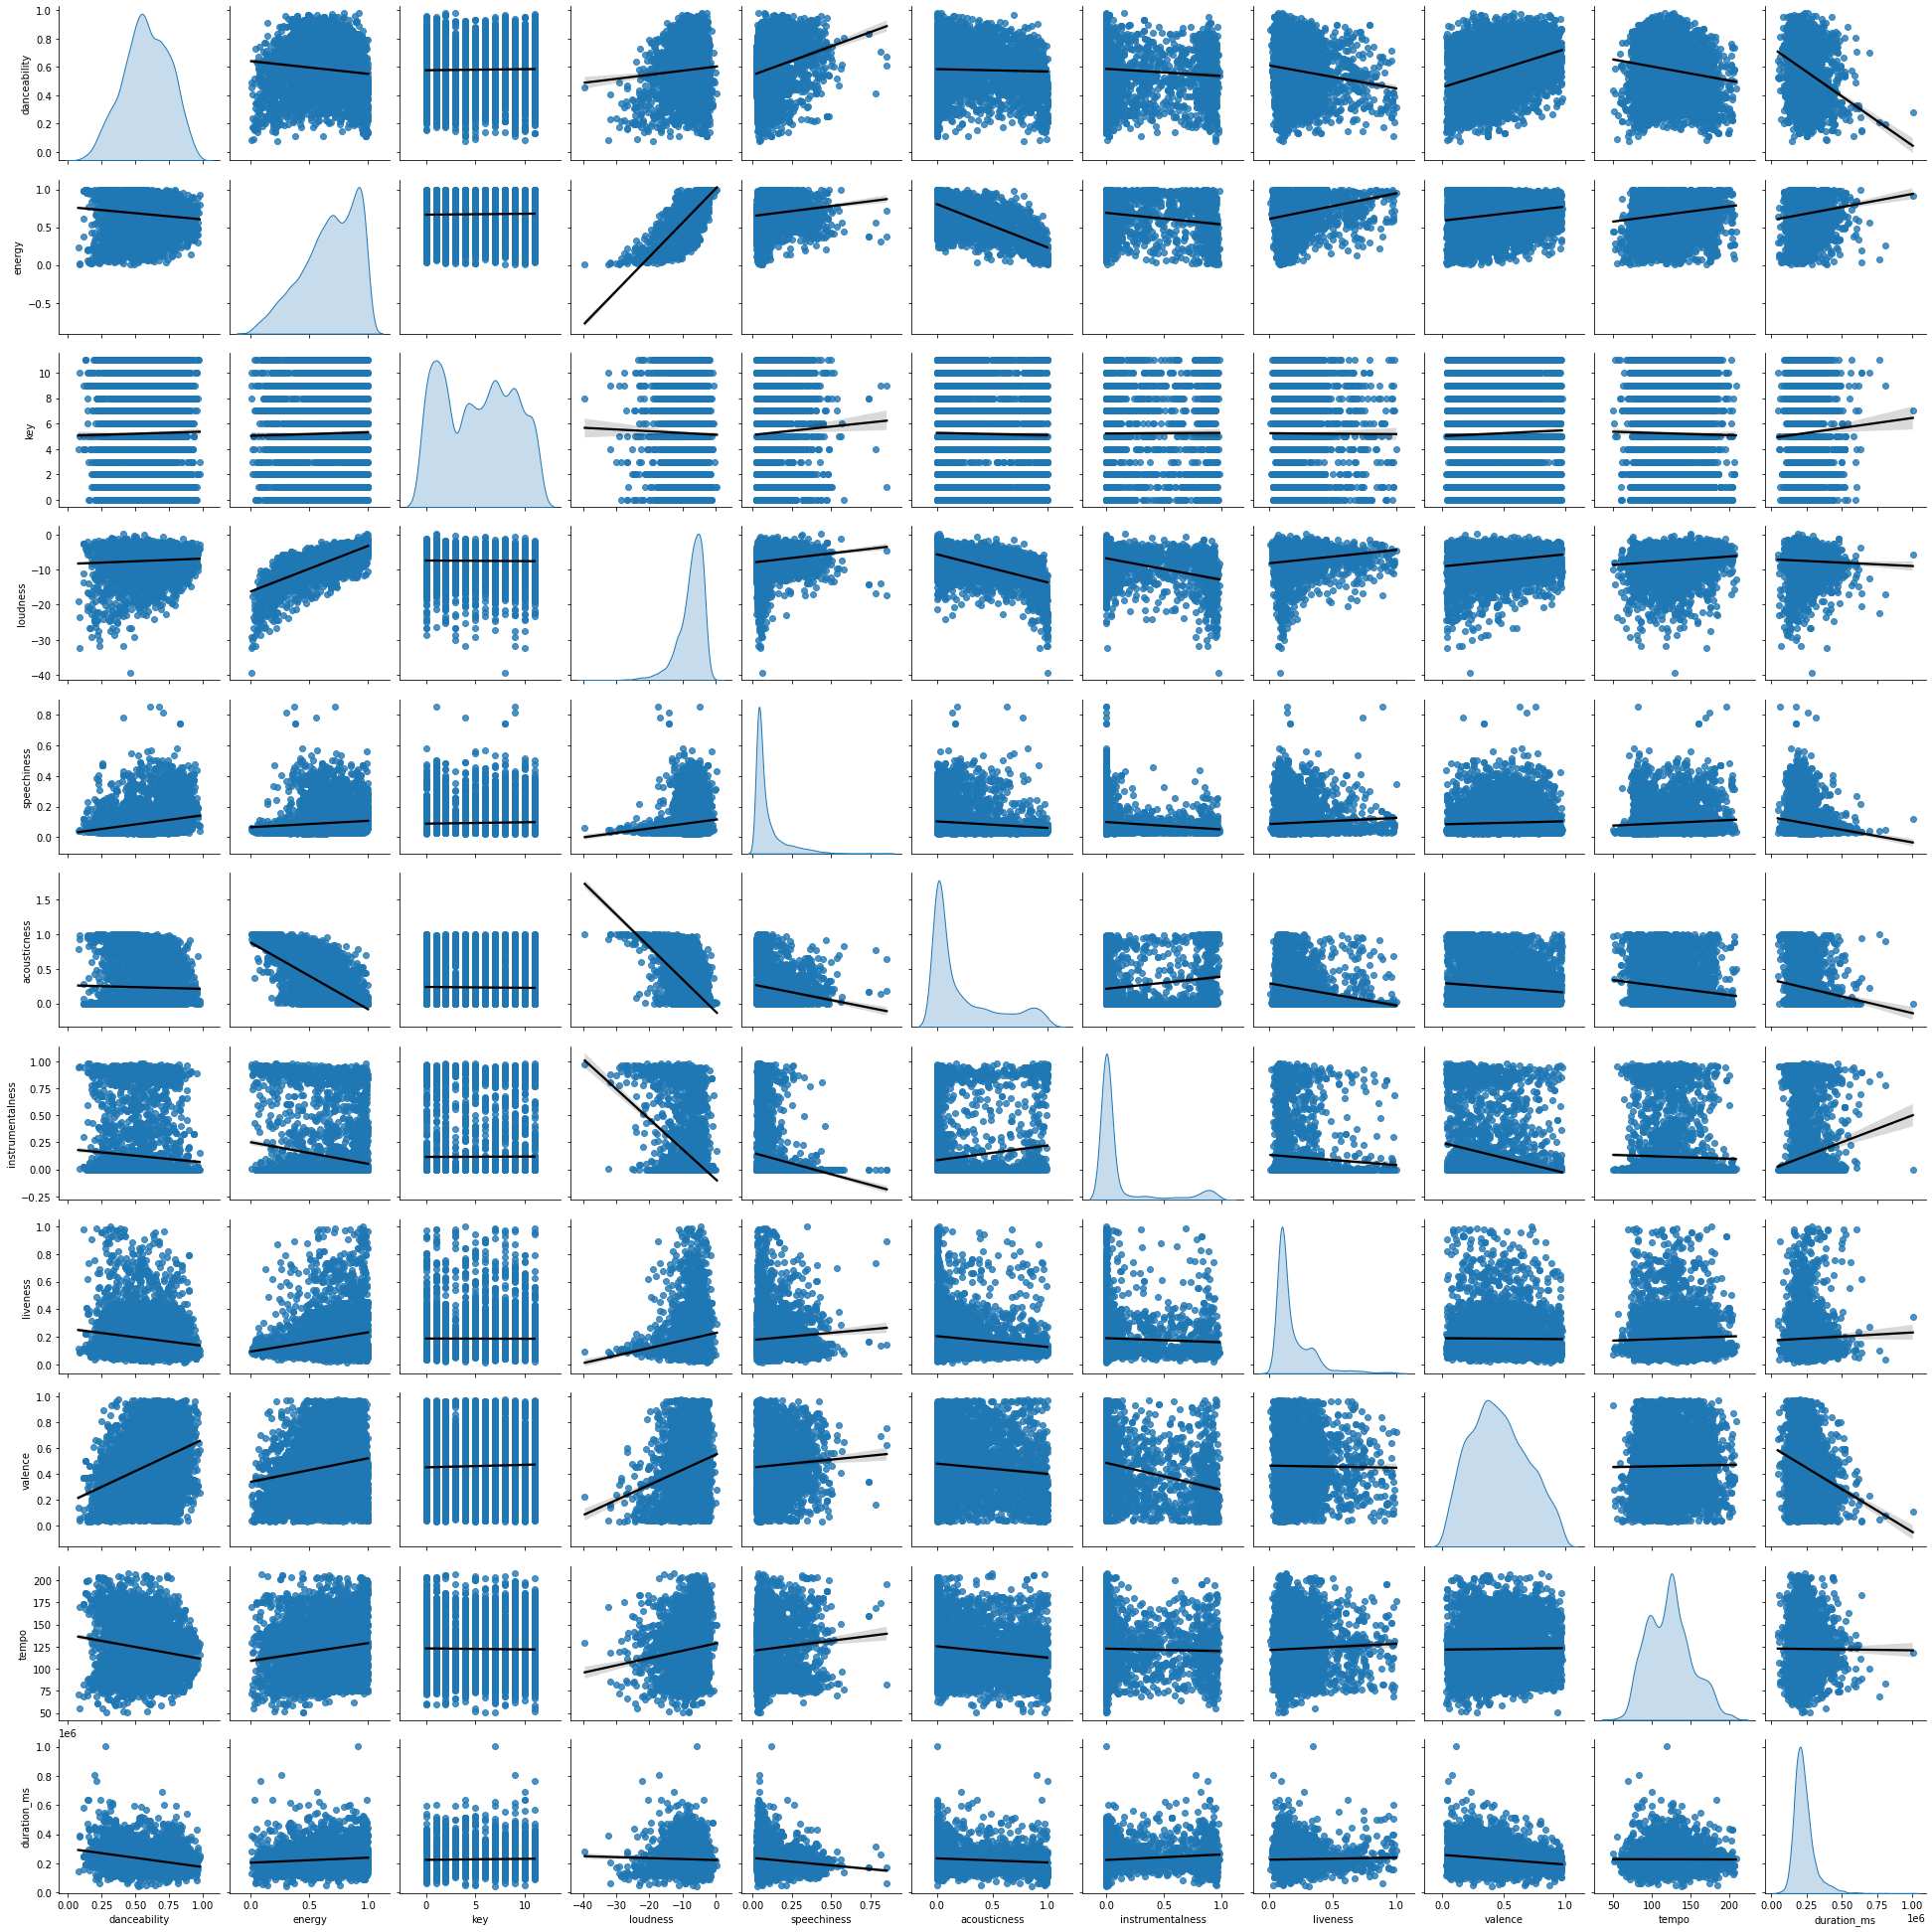

In [125]:
sns.pairplot(dfs_n, kind='reg', diag_kind='kde', plot_kws= {'line_kws': {'color':'black'}})

### Небольшая визуализация для презенташки

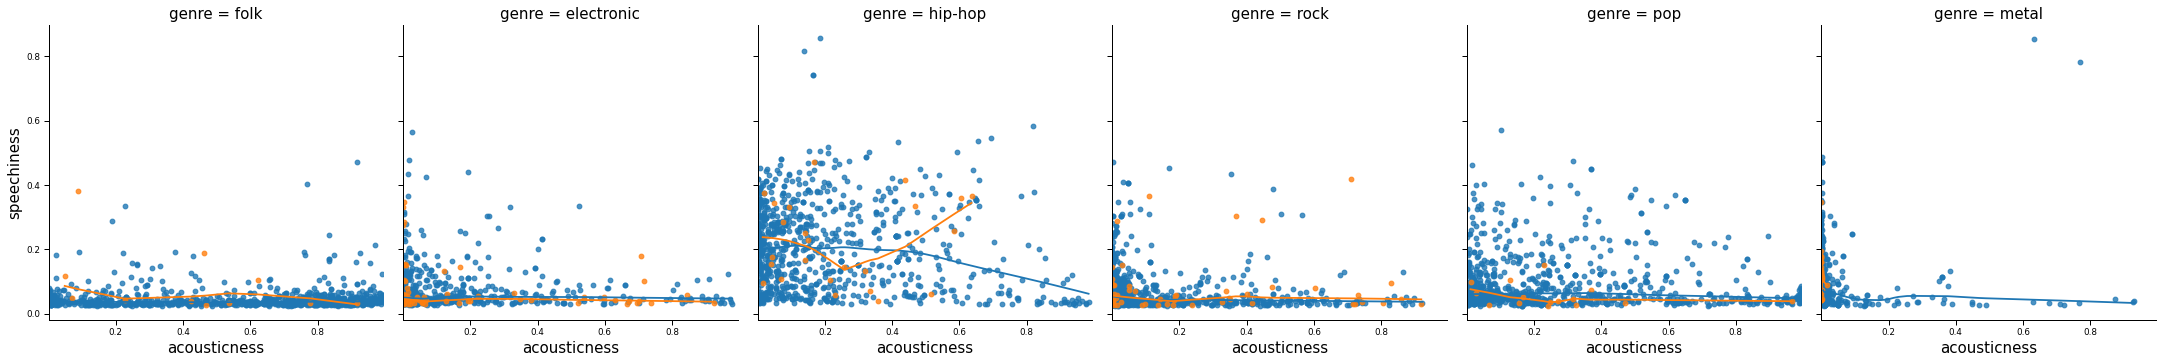

In [282]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":17,"axes.labelsize":15})
sns.lmplot(data=dfs_big, x="acousticness", y="speechiness", col="genre", hue="data", legend=False, lowess=True)

# sns.lmplot(ax=axes[1], data=dfs, x="energy", y="instrumentalness", hue="genre", lowess=True)
# sns.lmplot(ax=axes[2], data=dfs, x="duration_ms", y="tempo", hue="genre", lowess=True)

### tSNE для большого датасета по фичам Spotify

In [283]:
dfs_big

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre,data,dataset
0,0.586,0.350,3,-10.414,0.0279,0.7940,0.000173,0.1200,0.359,132.980,208800,folk,spotify,spotify
1,0.731,0.451,5,-12.621,0.0300,0.4820,0.022500,0.0890,0.890,120.055,266756,folk,spotify,spotify
2,0.491,0.809,10,-7.680,0.0332,0.3300,0.158000,0.0874,0.656,74.008,177366,folk,spotify,spotify
3,0.512,0.563,0,-6.552,0.0261,0.2020,0.001920,0.0794,0.471,94.050,291615,folk,spotify,spotify
4,0.682,0.581,5,-7.181,0.0344,0.4930,0.000000,0.1100,0.761,105.057,185862,folk,spotify,spotify
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5657,0.712,0.953,11,-8.409,0.0466,0.0388,0.914000,0.1110,0.213,125.008,341163,electronic,students,students
5658,0.736,0.759,9,-7.066,0.0347,0.0573,0.207000,0.0778,0.485,128.039,170059,electronic,students,students
5659,0.463,0.525,6,-13.032,0.0598,0.1300,0.926000,0.1400,0.152,125.056,376320,electronic,students,students
5660,0.685,0.630,1,-10.909,0.0417,0.0670,0.841000,0.1040,0.788,119.993,214154,electronic,students,students


In [14]:
dfs_n = dfs[['danceability',
  'energy',
  'key',
  'loudness',
  'speechiness',
  'acousticness',
  'instrumentalness',
  'liveness',
  'valence',
  'tempo', 
  'duration_ms']]
dfs_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5462 entries, 0 to 5461
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5462 non-null   float64
 1   energy            5462 non-null   float64
 2   key               5462 non-null   int64  
 3   loudness          5462 non-null   float64
 4   speechiness       5462 non-null   float64
 5   acousticness      5462 non-null   float64
 6   instrumentalness  5462 non-null   float64
 7   liveness          5462 non-null   float64
 8   valence           5462 non-null   float64
 9   tempo             5462 non-null   float64
 10  duration_ms       5462 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 469.5 KB


In [15]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
x = StandardScaler().fit_transform(dfs_n)
tsne_results = tsne.fit_transform(x)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5462 samples in 0.007s...
[t-SNE] Computed neighbors for 5462 samples in 0.663s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5462
[t-SNE] Computed conditional probabilities for sample 2000 / 5462
[t-SNE] Computed conditional probabilities for sample 3000 / 5462
[t-SNE] Computed conditional probabilities for sample 4000 / 5462
[t-SNE] Computed conditional probabilities for sample 5000 / 5462
[t-SNE] Computed conditional probabilities for sample 5462 / 5462
[t-SNE] Mean sigma: 0.823153
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.641579
[t-SNE] KL divergence after 5000 iterations: 1.650803


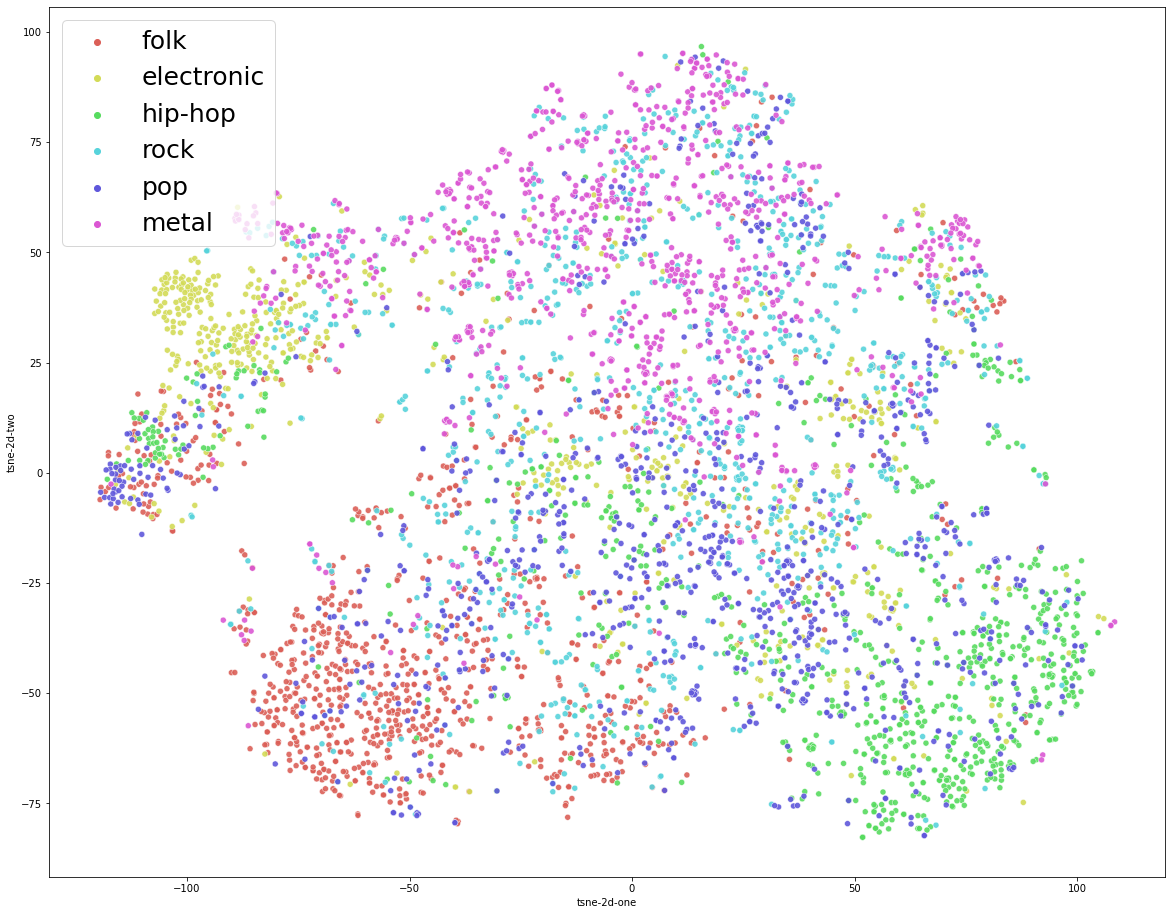

In [122]:
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['genre'] = dfs['genre']
plt.figure(figsize=(20,16))

scatter = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="genre",
    palette=sns.color_palette("hls", 6),
    data=df_subset,
    legend="full",
    alpha=0.9
)

scatter.legend(fontsize = 25) 

### корплот по фичам спотифая для большого датасета

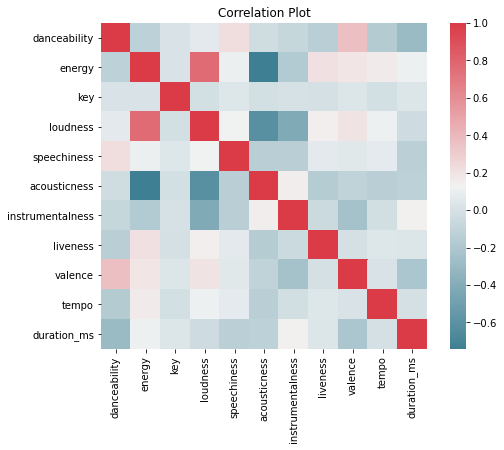

In [24]:
corr_df=x_train
cor= corr_df.corr(method='pearson')

fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

### Создание общей таблицы для большого и маленького датасета

In [67]:
dfs_1 = dfs[['danceability',
  'energy',
  'key',
  'loudness',
  'speechiness',
  'acousticness',
  'instrumentalness',
  'liveness',
  'valence',
  'tempo', 
  'duration_ms', 'genre']]
dfs_1.columns

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'genre'],
      dtype='object')

In [ ]:
dfs_37_1 = dfs_37[['danceability',
  'energy',
  'key',
  'loudness',
  'speechiness',
  'acousticness',
  'instrumentalness',
  'liveness',
  'valence',
  'tempo', 
  'duration_ms', 'coarse_genre']].rename(columns = {'coarse_genre':'genre'})
dfs_37_1.columns

### Создание общей таблицы по Spotify based фичам 

In [92]:
dfs_1 = dfs_1.assign(dataset='spotify')
dfs_37_1 = dfs_37_1.assign(dataset='students')

In [93]:
dfs_37_1

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre,data,dataset
0,0.759,0.553,11,-8.489,0.0620,0.00437,0.000123,0.2200,0.5700,111.037,180372,rock,students,students
1,0.587,0.698,1,-8.948,0.0943,0.01520,0.000000,0.4420,0.0985,133.954,310720,hip-hop,students,students
2,0.568,0.837,1,-6.138,0.0266,0.09000,0.058700,0.0994,0.8530,104.988,245867,rock,students,students
3,0.516,0.832,6,-5.350,0.0606,0.51500,0.000002,0.3610,0.5380,168.119,138373,hip-hop,students,students
4,0.507,0.889,7,-2.755,0.0860,0.04950,0.000000,0.0983,0.3330,135.021,238360,rock,students,students
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.712,0.953,11,-8.409,0.0466,0.03880,0.914000,0.1110,0.2130,125.008,341163,electronic,students,students
296,0.736,0.759,9,-7.066,0.0347,0.05730,0.207000,0.0778,0.4850,128.039,170059,electronic,students,students
297,0.463,0.525,6,-13.032,0.0598,0.13000,0.926000,0.1400,0.1520,125.056,376320,electronic,students,students
298,0.685,0.630,1,-10.909,0.0417,0.06700,0.841000,0.1040,0.7880,119.993,214154,electronic,students,students


In [104]:
dfs_big = pd.concat([dfs_1, dfs_37_1], ignore_index=True)

In [80]:
dfs_big_n = dfs_big[['danceability',
  'energy',
  'key',
  'loudness',
  'speechiness',
  'acousticness',
  'instrumentalness',
  'liveness',
  'valence',
  'tempo', 
  'duration_ms']]

In [274]:
dfs_big

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre,data,dataset
0,0.586,0.350,3,-10.414,0.0279,0.7940,0.000173,0.1200,0.359,132.980,208800,folk,spotify,spotify
1,0.731,0.451,5,-12.621,0.0300,0.4820,0.022500,0.0890,0.890,120.055,266756,folk,spotify,spotify
2,0.491,0.809,10,-7.680,0.0332,0.3300,0.158000,0.0874,0.656,74.008,177366,folk,spotify,spotify
3,0.512,0.563,0,-6.552,0.0261,0.2020,0.001920,0.0794,0.471,94.050,291615,folk,spotify,spotify
4,0.682,0.581,5,-7.181,0.0344,0.4930,0.000000,0.1100,0.761,105.057,185862,folk,spotify,spotify
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5657,0.712,0.953,11,-8.409,0.0466,0.0388,0.914000,0.1110,0.213,125.008,341163,electronic,students,students
5658,0.736,0.759,9,-7.066,0.0347,0.0573,0.207000,0.0778,0.485,128.039,170059,electronic,students,students
5659,0.463,0.525,6,-13.032,0.0598,0.1300,0.926000,0.1400,0.152,125.056,376320,electronic,students,students
5660,0.685,0.630,1,-10.909,0.0417,0.0670,0.841000,0.1040,0.788,119.993,214154,electronic,students,students


### tSNE - как распределены треки из датасета студентов в большой базе

In [82]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
x = StandardScaler().fit_transform(dfs_big_n)
tsne_results_big = tsne.fit_transform(x)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5662 samples in 0.008s...
[t-SNE] Computed neighbors for 5662 samples in 0.743s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5662
[t-SNE] Computed conditional probabilities for sample 2000 / 5662
[t-SNE] Computed conditional probabilities for sample 3000 / 5662
[t-SNE] Computed conditional probabilities for sample 4000 / 5662
[t-SNE] Computed conditional probabilities for sample 5000 / 5662
[t-SNE] Computed conditional probabilities for sample 5662 / 5662
[t-SNE] Mean sigma: 0.819646
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.067802
[t-SNE] KL divergence after 5000 iterations: 1.673392


In [167]:
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results_big[:,0]
df_subset['tsne-2d-two'] = tsne_results_big[:,1]
df_subset['dataset'] = dfs_big['dataset']
df_subset

,tsne-2d-one,tsne-2d-two,dataset
0,69.535019,37.402771,spotify
1,46.695366,-17.622471,spotify
2,60.680267,-8.073806,spotify
3,-13.910710,15.512080,spotify
4,50.518497,-26.187227,spotify
...,...,...,...
5657,-7.110446,102.912582,students
5658,6.033573,12.840787,students
5659,-1.800770,102.813370,students
5660,3.171859,80.619476,students


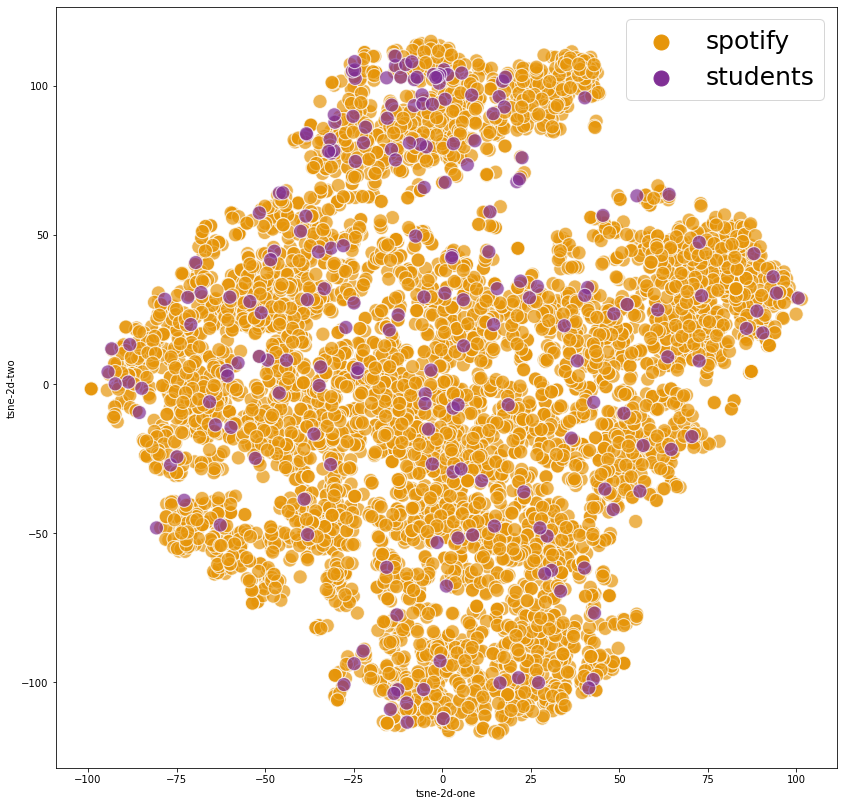

In [188]:
plt.figure(figsize=(14,14))


scatter = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="dataset",
    palette=sns.color_palette("CMRmap_r", 2),
    data=df_subset,
    legend="full",
    alpha=0.7,
    s=200
)

scatter.legend(fontsize = 25, markerscale=2.5) 

### tSNE по librosa based фичам

In [193]:
df_mus = pd.read_csv("~/storage/drive/DF_3.csv")
df_mus = df_mus.query("basic_genre != 'Other'")
df_mus[['song','basic_genre']].groupby("basic_genre").count().sort_values('song', ascending=False)

,song
basic_genre,
Electronic,66
Rock,54
Metal,31
Folk,26
Indie_Rock,24
Indie,23
Pop,23
Hip-Hop,22
Symphonic_Metal,20


In [194]:
df_musN = df_mus.iloc[:,7:-1]

In [195]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
x = StandardScaler().fit_transform(df_musN)
tsne_results = tsne.fit_transform(x)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 307 samples in 0.002s...
[t-SNE] Computed neighbors for 307 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 307 / 307
[t-SNE] Mean sigma: 1.985893
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.903625
[t-SNE] KL divergence after 1300 iterations: 0.723178


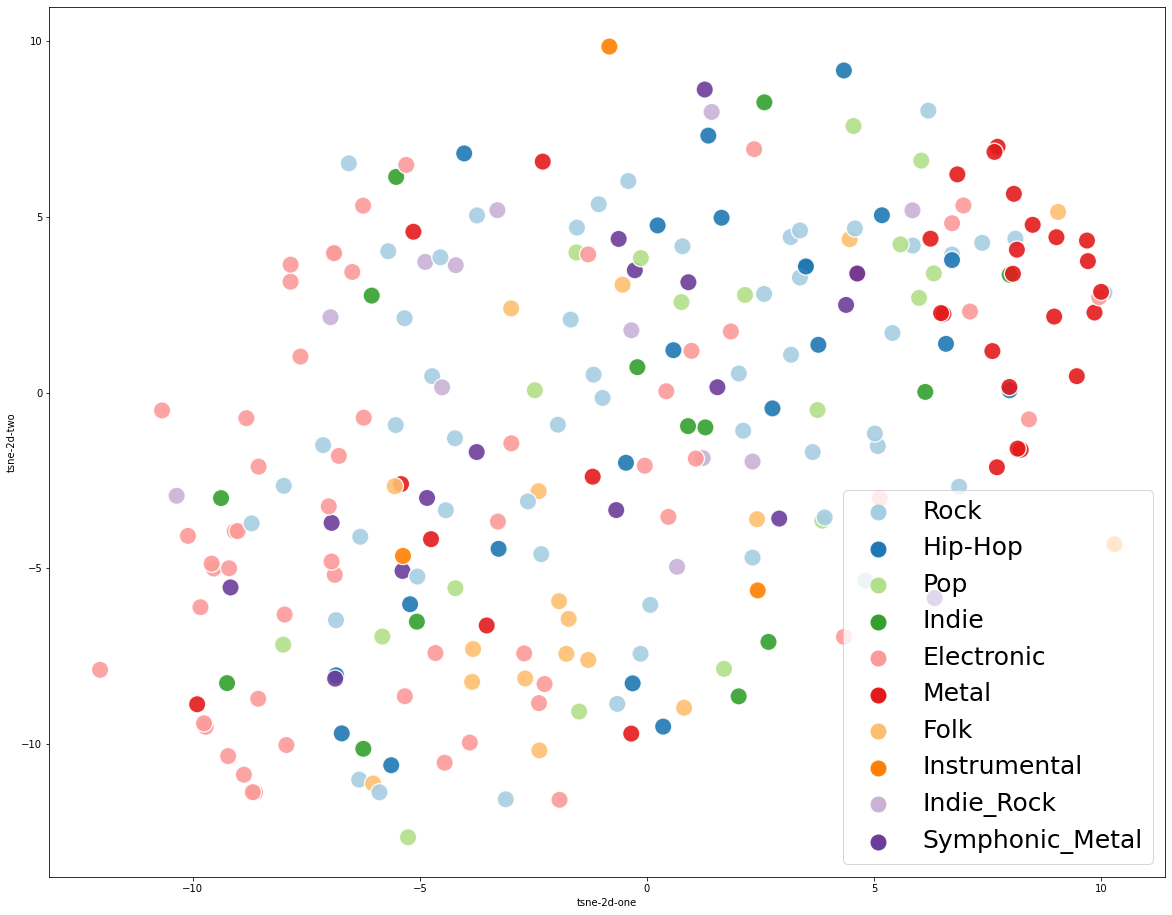

In [199]:
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['genre'] = df_mus['basic_genre']
plt.figure(figsize=(20,16))

scatter = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="genre",
    palette=sns.color_palette("Paired", 10),
    data=df_subset,
    legend="full",
    alpha=0.9,
    s=300
)

scatter.legend( markerscale=2.5, fontsize = 25) 

### корплот по librosa based фичам

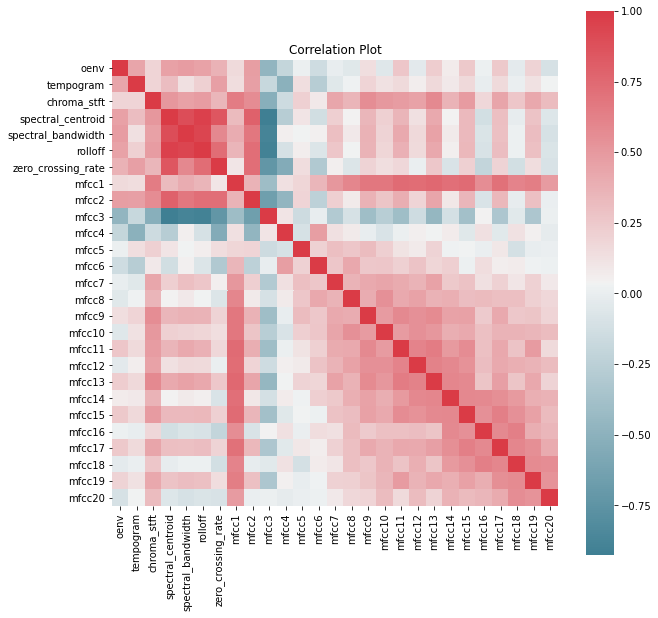

In [201]:
corr_df=x_train
cor= df_musN.corr(method='pearson')

fig, ax =plt.subplots(figsize=(10, 10))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()